<a href="https://colab.research.google.com/github/ankitg-02/Credit-Card-Transaction-Analysis/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv(r'/content/Credit card transactions - India - Simple.csv')
credit=pd.DataFrame(data)
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [23]:
(credit.isnull().sum()/len(credit))*100

index        0.0
City         0.0
Date         0.0
Card Type    0.0
Exp Type     0.0
Gender       0.0
Amount       0.0
dtype: float64

In [24]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [25]:
credit['Date']= pd.to_datetime(credit['Date'])

In [26]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


In [27]:
credit['Date']=credit['Date'].dt.date

In [28]:
credit.sample(5)

,index,City,Date,Card Type,Exp Type,Gender,Amount
357,357,"Ahmedabad, India",2014-05-14,Signature,Bills,F,118112
8480,8480,"Ahmedabad, India",2014-10-23,Platinum,Grocery,M,270679
24539,24539,"Kanpur, India",2014-05-29,Platinum,Fuel,F,60074
1352,1352,"Bengaluru, India",2014-04-12,Silver,Food,F,216694
25507,25507,"Jaipur, India",2015-01-24,Gold,Travel,M,291780


In [29]:
credit.describe(include='all')

,index,City,Date,Card Type,Exp Type,Gender,Amount
count,26052.000000,26052,26052,26052,26052,26052,26052.000000
unique,NaN,986,600,4,6,2,NaN
top,NaN,"Bengaluru, India",2014-09-20,Silver,Food,F,NaN
freq,NaN,3552,65,6840,5463,13680,NaN
mean,13025.500000,NaN,NaN,NaN,NaN,NaN,156411.537425
std,7520.708943,NaN,NaN,NaN,NaN,NaN,103063.254287
min,0.000000,NaN,NaN,NaN,NaN,NaN,1005.000000
25%,6512.750000,NaN,NaN,NaN,NaN,NaN,77120.250000
50%,13025.500000,NaN,NaN,NaN,NaN,NaN,153106.500000
75%,19538.250000,NaN,NaN,NaN,NaN,NaN,228050.000000


In [30]:
for i in credit.columns:
  print(i,credit[i].unique())

index [    0     1     2 ... 26049 26050 26051]
City ['Delhi, India' 'Greater Mumbai, India' 'Bengaluru, India'
 'Ahmedabad, India' 'Markapur, India' 'Mavoor, India' 'Sillod, India'
 'Nainital, India' 'Laharpur, India' 'Shenkottai, India'
 'Neyveli (TS), India' 'Kapadvanj, India' 'Arambagh, India'
 'Thana Bhawan, India' 'Kancheepuram, India' 'Sojat, India'
 'Karjat, India' 'Mohali, India' 'Narayanpet, India' 'Bhavnagar, India'
 'Viluppuram, India' 'Jamalpur, India' 'Udaipurwati, India'
 'Palanpur, India' 'Muzaffarpur, India' 'Taranagar, India'
 'Ambikapur, India' 'Mundi, India' 'Padrauna, India' 'Vijayapura, India'
 'Vrindavan, India' 'Byasanagar, India' 'Mudhol, India' 'Sohna, India'
 'Pune, India' 'Lakheri, India' 'Jehanabad, India' 'Shegaon, India'
 'Shikarpur Bulandshahr, India' 'Dalli-Rajhara, India' 'Mapusa, India'
 'Uthamapalayam, India' 'Nasirabad, India' 'Kapurthala, India'
 'Anand, India' 'Arwal, India' 'Nanded-Waghala, India' 'Nilambur, India'
 'Anjar, India' 'Hubli-Dharwad,

In [31]:
credit['City_imputation']=credit['City'].str.split(',',n=0,expand=True)[0]

In [32]:
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,City_imputation
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,Delhi
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,Greater Mumbai
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,Bengaluru
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,Greater Mumbai
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,Bengaluru


from matplotlib import pyplot as plt
_df_20['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Amount'].plot(kind='hist', bins=20, title='Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('Card Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('City_imputation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='index', y='Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('City')):
  _plot_series(series, series_name, i)
  fig.legend(title='City', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Card Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Card Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('City_imputation')):
  _plot_series(series, series_name, i)
  fig.legend(title='City_imputation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Amount')

from matplotlib import pyplot as plt
_df_31['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Amount'].plot(kind='line', figsize=(8, 4), title='Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Date'].value_counts()
    for x_label, grp in _df_33.groupby('City')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('City')
_ = plt.ylabel('Date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Card Type'].value_counts()
    for x_label, grp in _df_34.groupby('Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Date')
_ = plt.ylabel('Card Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['City_imputation'].value_counts()
    for x_label, grp in _df_35.groupby('Card Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Card Type')
_ = plt.ylabel('City_imputation')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='index', y='City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='index', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['Card Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='index', y='Card Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['City_imputation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='index', y='City_imputation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

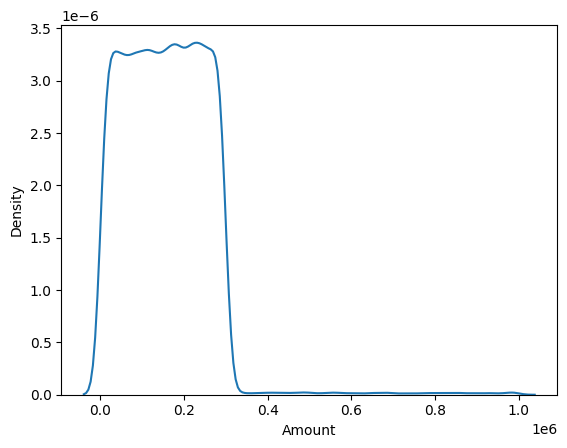

In [33]:
sns.kdeplot(credit['Amount'])
plt.show()

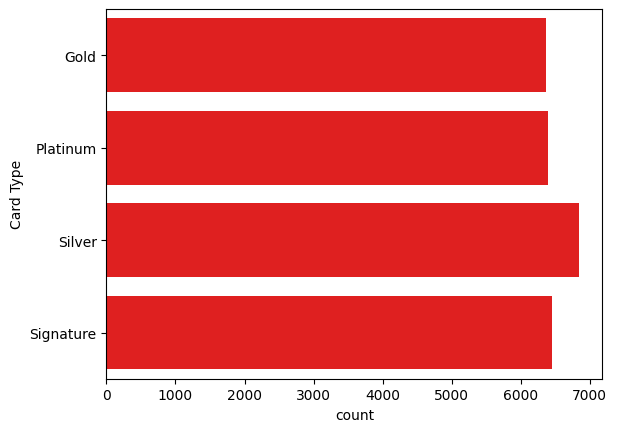

In [60]:
sns.countplot(credit['Card Type'],color='red')
plt.show()

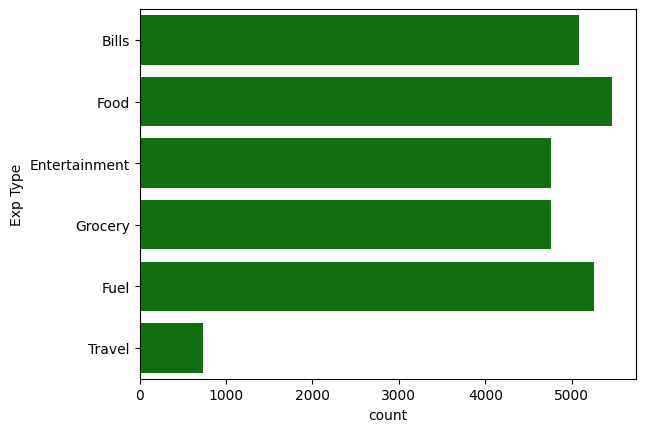

In [34]:
sns.countplot(credit['Exp Type'],color='green')
plt.show()

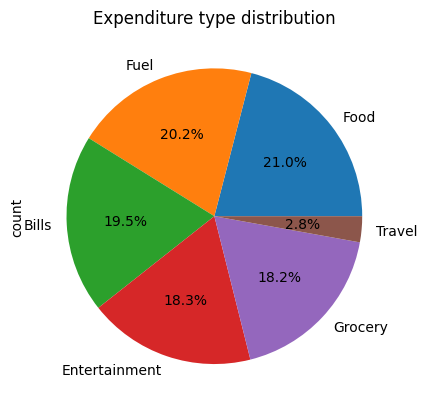

In [56]:
credit['Exp Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=credit['Exp Type'].value_counts().index)
plt.title('Expenditure type distribution')
plt.show()


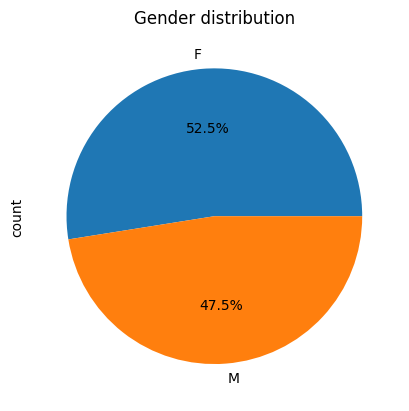

In [63]:
credit['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=credit['Gender'].value_counts().index)
plt.title('Gender distribution')
plt.show()


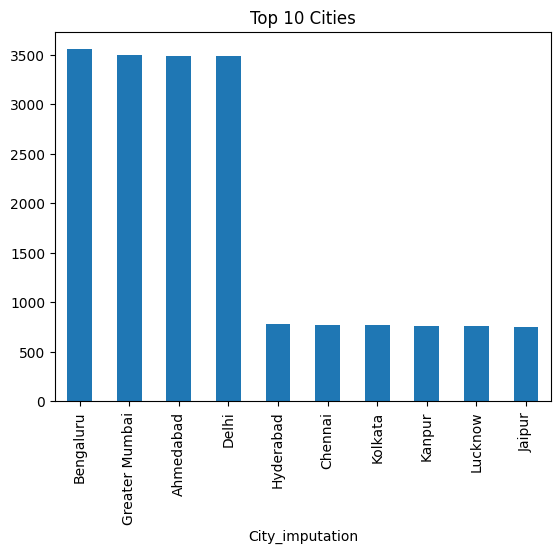

In [69]:
credit['City_imputation'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Cities')
plt.show()